d:\Projects\Stable_diffusion_from_scratch\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device cpu


100%|██████████| 50/50 [11:50<00:00, 14.20s/it]


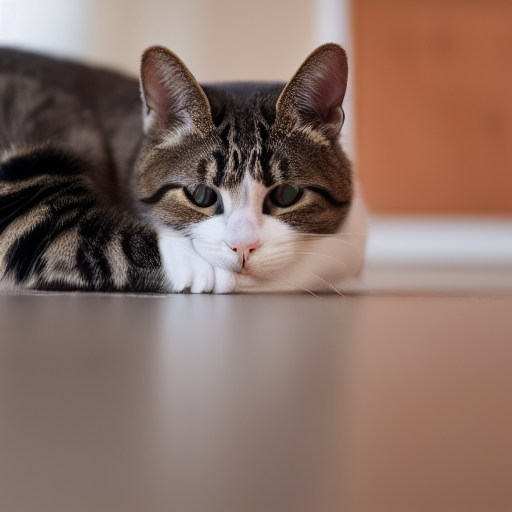

In [ ]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif torch.backends.mps.is_available() and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

prompt = "A dog stretching on the floor, highly detailed, ultra sharp, cinematic, 8k resolution"
uncond_prompt = "" # You can use it as a negative prompt
do_cfg = True
cfg_scale = 7

## IMAGE TO IMAGE

input_image = None
image_path = "../images/thumb-1920-916071.jpg"
input_image = Image.open(image_path)
strength = 0.9

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt = prompt, 
    uncond_prompt=uncond_prompt,
    input_image = input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name = sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer
)

Image.fromarray(output_image)

In [ ]:
import importlib, model_converter, torch
print(torch.__version__)
print(model_converter.__file__)
importlib.reload(model_converter)


2.10.0+cpu
d:\Projects\Stable_diffusion_from_scratch\sd\model_converter.py


<module 'model_converter' from 'd:\\Projects\\Stable_diffusion_from_scratch\\sd\\model_converter.py'>